<a href="https://colab.research.google.com/github/joysterr/ml-digit-classification/blob/main/digit_classification_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NNs to classify mnist dataset

## Imports

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras import layers

## Load mnist dataset

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

## Define model architecture

### Basic Feed Forward NN

In [5]:
model_basic = tf.keras.models.Sequential([
  layers.Flatten(input_shape=(28, 28)),
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(10, activation='softmax')
])

In [6]:
model_basic.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
hist_basic = model_basic.fit(x_train, y_train, epochs=1)

1875/1875 [==============================] - 9s 3ms/step - loss: 0.2640 - accuracy: 0.9219


In [8]:
model_basic.save('basic_seq.model')

### CNN model

In [9]:
model_cnn = tf.keras.models.Sequential([
  layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.2),
  layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(10, activation='softmax')
])

In [10]:
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
hist_cnn = model_cnn.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 4ms/step - loss: 0.2215 - accuracy: 0.9320
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0813 - accuracy: 0.9755
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0590 - accuracy: 0.9819
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0475 - accuracy: 0.9852
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0410 - accuracy: 0.9872


In [12]:
model_cnn.save('model_cnn.model')

## Evaluate models

In [14]:
def evaluate_model(model_name):
  loss, accuracy = model_name.evaluate(x_test, y_test)
  print('loss:' , loss)
  print('accuracy: ', accuracy)

evaluate_model(model_basic)
evaluate_model(model_cnn)

313/313 [==============================] - 1s 2ms/step - loss: 0.1282 - accuracy: 0.9608
loss: 0.12817177176475525
accuracy:  0.9607999920845032
313/313 [==============================] - 1s 3ms/step - loss: 0.0285 - accuracy: 0.9905
loss: 0.028464650735259056
accuracy:  0.9904999732971191


## Custom test data predictions

In [29]:
def custom_digit_test(model):
  img_num = 1
  while os.path.isfile(f'digits/{img_num}.png'):
    try:
      img = cv2.imread(f'digits/{img_num}.png')[:,:,0]
      img = np.invert(np.array([img]))
      prediction = model.predict(img)
      print(f'Digit is: {np.argmax(prediction)}')
      plt.imshow(img[0], cmap=plt.cm.binary)
      plt.show()
    except:
      print('error')
    finally:
      img_num += 1

model basic: 
1/1 [==============================] - 0s 83ms/step
Digit is: 7


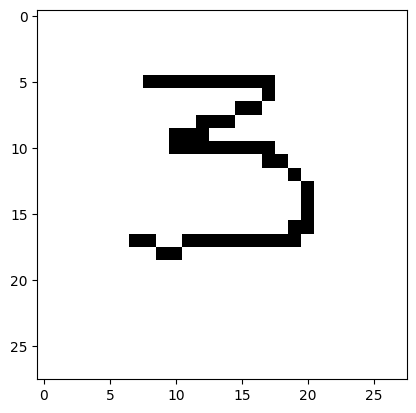

1/1 [==============================] - 0s 17ms/step
Digit is: 3


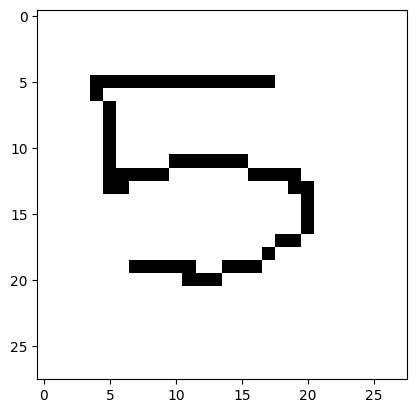

1/1 [==============================] - 0s 18ms/step
Digit is: 3


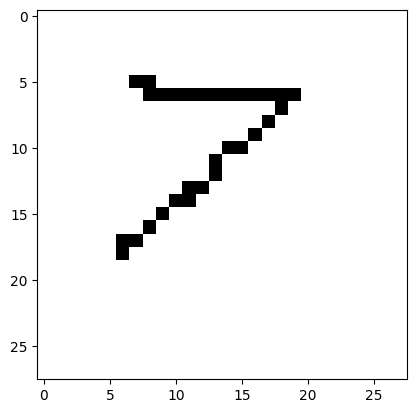

model cnn: 
1/1 [==============================] - 0s 179ms/step
Digit is: 2


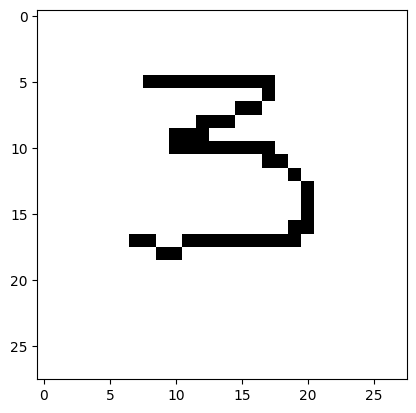

1/1 [==============================] - 0s 18ms/step
Digit is: 5


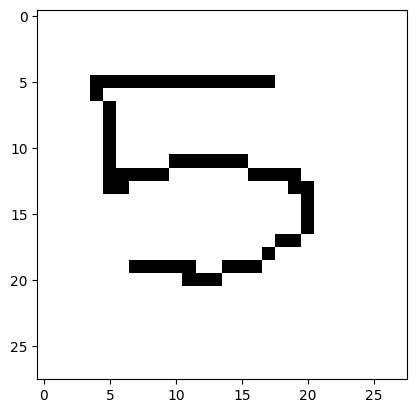

1/1 [==============================] - 0s 19ms/step
Digit is: 7


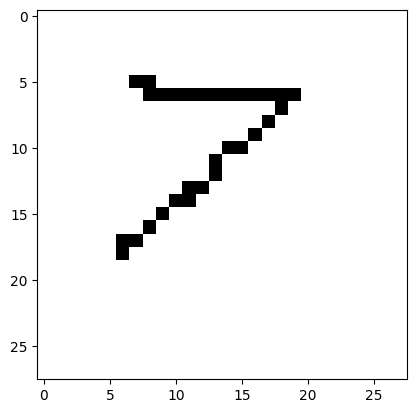

In [30]:
print('model basic: ')
custom_digit_test(model_basic)
print('model cnn: ')
custom_digit_test(model_cnn)